In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt # 画图工具
import numpy as np
import pandas as pd
%matplotlib inline

# 读取并探索数据
inputfile = 'wisc_bc_ContinuousVar.csv'
data = pd.read_csv(inputfile)
print(data.head())
print(data.describe())
print(data.info())
print(data.diagnosis.value_counts())
 
# 数据清洗与分类
# print(data.columns)
data_y = data.diagnosis.replace(['B', 'M'], [0, 1])
# print(data_y.value_counts())
# 把平均值数据, 方差数据与最坏值数据分开
data_mean = data[data.columns[2:12]]
# print(data_mean.columns)
data_se = data[data.columns[12:22]]
# print(data_se.columns)
data_worst = data[data.columns[22:32]]
# print(data_worst.columns)



         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_s

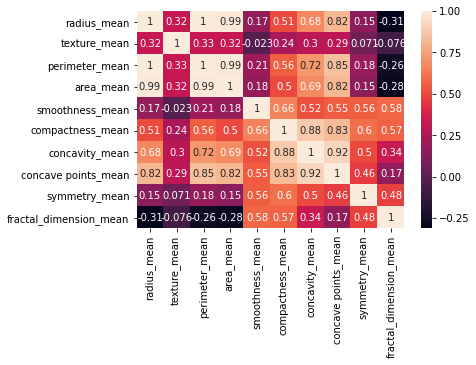

Score of SVM model: 0.9298245614035088


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)

# 读取并探索数据
inputfile = 'wisc_bc_ContinuousVar.csv'
data = pd.read_csv(inputfile)
print(data.head())
print(data.describe())
print(data.info())
print(data.diagnosis.value_counts())

# 数据清洗与分类
# print(data.columns)
data_y = data.diagnosis.replace(['B', 'M'], [0, 1])
# print(data_y.value_counts())
# 把平均值数据, 方差数据与最坏值数据分开
data_mean = data[data.columns[2:12]]
# print(data_mean.columns)
data_se = data[data.columns[12:22]]
# print(data_se.columns)
data_worst = data[data.columns[22:32]]
# print(data_worst.columns)

# 1. 相关性分析降维
# 画相关性系数图
mean_corr = data_mean.corr()
sns.heatmap(mean_corr, annot=True)
plt.show()
# 特征选择
features1 = data[['radius_mean', 'texture_mean', 'smoothness_mean',
                  'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean']]
# 标准化
ss = StandardScaler()
features1 = ss.fit_transform(features1)
# 训练集数据集分割
train_x, test_x, train_y, test_y = train_test_split(features1, data_y, test_size=.3, random_state=33)
# LinearSVC模型
model1 = LinearSVC()
model1.fit(train_x, train_y)
pre_1 = model1.predict(test_x)
print('Score of SVM model:', accuracy_score(test_y, pre_1))